In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import ipywidgets as widgets
import requests
from bond import Bond, ILB
from cpi import RefCPI
from datasets import df_prices, df_info

sns.set()

## Exploratory Data Analysis
### Overview

In [2]:
ilbs = df_info[df_info["TYPE"] == "ILB"].index.values
noms = df_info[df_info["TYPE"]=="NOM"].index.values

df_ilbs = df_prices.loc[:,ilbs]
df_noms = df_prices.loc[:,noms]

df_info.head()

,ISIN CODE,NAME,COUPON,AMOUNT ISSUED,COUPON DATES,INDEX LINKED COUP,COUPONS PER YEAR,1ST COUPON VALUE,OTHER YIELD,RED. YIELD,CURRENCY,ISSUE DATE,MATURITY YEAR,START YEAR,ACTIVE,REDEMPTION DATE,REF CPI BASE,TYPE
Type,,,,,,,,,,,,,,,,,,
846111,CA135087VS05,CANADA 1995 4 1/4% 01/12/26 INDXLK.,7.6333,5250000.0,"01/06,01/12",4.25,2,2.06100,2.241,NaN,C$,1995-12-07 00:00:00,2026,1995,Active,2026-12-01 00:00:00,87.82571,ILB
610286,CA135087WV25,CANADA 1999 4% 01/12/31 INDXLK.,6.9046,5800000.0,"01/06,01/12",4.00,2,0.93150,2.129,NaN,C$,1999-03-08 00:00:00,2031,1999,Active,2031-12-01 00:00:00,91.38249,ILB
248402,CA135087XQ21,CANADA 2003 3% 01/12/36 INDXLK.,4.5947,5850000.0,"01/06,01/12",3.00,2,1.43840,2.100,NaN,C$,2003-06-09 00:00:00,2036,2003,Active,2036-12-01 00:00:00,102.99160,ILB
97059Q,CA135087YK42,CANADA 2007 2% 01/12/41 INDXLK.,2.8366,6550000.0,"01/06,01/12",2.00,2,0.98630,2.122,NaN,C$,2007-06-04 00:00:00,2041,2007,Active,2041-12-01 00:00:00,111.21849,ILB
5653HV,CA135087ZH04,CANADA 2010 1 1/2% 01/12/44 INDXLK.,2.0468,7700000.0,"01/06,01/12",1.50,2,0.00411,2.082,NaN,C$,2010-05-31 00:00:00,2044,2010,Active,2044-12-01 00:00:00,115.60000,ILB


In [3]:
df_ilbs.describe()

,846111,610286,248402,97059Q,5653HV,787NK8,849UMH,645HW9,49199C,597973,49197V,491985,491987,491989,49197U,491986,491970,491988,5771H1
count,7101.000000,6388.000000,5291.000000,4254.000000,3472.000000,2560.000000,1644.000000,595.000000,5066.000000,3220.000000,2042.000000,3089.000000,3350.000000,3611.000000,2651.000000,3220.000000,3174.000000,3481.000000,2434.000000
mean,131.523548,140.659286,137.296017,125.957902,121.250779,118.027191,99.411933,83.899106,81.427279,123.895963,93.834697,87.900612,86.977643,86.875287,88.202239,87.932411,86.273961,87.227865,90.442711
std,15.402941,17.718808,15.301789,14.941273,11.080769,11.938679,13.132456,14.599387,13.362473,12.519545,4.458731,10.957277,12.636888,14.121155,9.916209,11.801358,12.332432,13.382392,3.990232
min,91.270000,97.190000,96.380000,83.407000,90.095000,85.543000,70.040000,62.547000,53.700000,100.012000,84.340000,62.530000,58.100000,55.100000,66.960000,59.890000,59.560000,56.740000,79.110000
25%,121.046000,126.686250,125.490000,113.618750,114.745000,112.396500,91.504750,72.561500,71.290500,111.268000,89.898500,82.770000,79.633100,78.403200,74.270000,81.808250,80.821250,79.170000,87.855000
50%,132.271000,145.215000,140.085000,130.043000,122.686500,118.104000,99.040500,77.984000,78.861500,127.878000,95.527000,92.682000,91.165500,88.909000,91.471000,92.402000,92.423000,90.396000,92.762000
75%,143.390000,152.328000,148.416500,137.485000,129.272250,126.102250,109.214500,100.148000,95.691000,132.350000,95.527000,95.736000,98.136500,98.442000,96.447000,97.954500,92.522000,98.467000,92.762000
max,163.310000,177.060000,167.760000,151.729000,144.881000,144.432000,126.483000,113.357000,99.632000,144.160000,100.299000,100.645000,103.258000,110.655000,97.066000,101.441000,101.604000,107.468000,94.478000


## Historical Prices
### Inspecting the ILBs

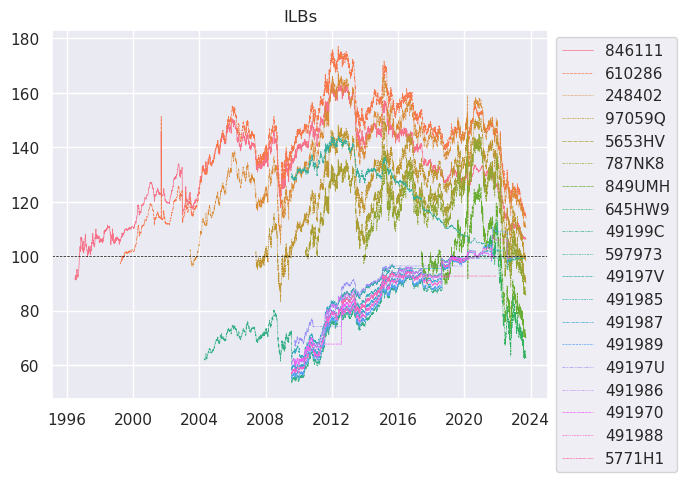

In [4]:
fig, ax = plt.subplots()
lines = sns.lineplot(df_ilbs,linewidth=0.5,ax=ax)
ax.axhline(y=100,linestyle="--",color="black",linewidth=0.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("ILBs")
plt.show()

### Maturities and reported Market Data

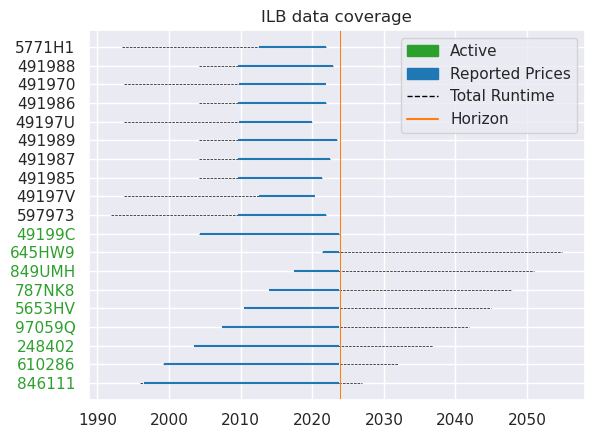

In [5]:
y = list(range(len(df_ilbs.columns)))
#available data
xmin = [min(df_ilbs[col].dropna().index) for col in df_ilbs.columns] 
xmax = [max(df_ilbs[col].dropna().index) for col in df_ilbs.columns]

#issue, maturity
issue_dates = [df_info.loc[bond,"ISSUE DATE"] for bond in df_ilbs.columns]
redem_dates = [df_info.loc[bond,"REDEMPTION DATE"] for bond in df_ilbs.columns]

fig, ax = plt.subplots()
plt.hlines(y=y,xmin=issue_dates,xmax=redem_dates, colors="black", linestyles="dashed", linewidths = .5)
plt.hlines(y=y,xmin=xmin,xmax=xmax,colors="tab:blue")
ax.axvline(x = max(df_ilbs.index),color="tab:orange",linewidth=0.75)
ax.set_yticks(list(range(len(df_ilbs.columns))))
ax.set_yticklabels(df_ilbs.columns)

for t in ax.yaxis.get_ticklabels():
    if df_info.loc[t.get_text(),"ACTIVE"] == "Active":
        t.set_color("tab:green")

plt.legend(handles=[mpatches.Patch(color="tab:green",label="Active"),
                    mpatches.Patch(color="tab:blue",label="Reported Prices"),
                    mlines.Line2D([0],[0],color="black",linestyle="dashed",linewidth=1, label="Total Runtime"),
                   mlines.Line2D([0],[1],color="tab:orange",label = "Horizon")])

ax.set_title("ILB data coverage")

plt.show()

### Inspecting Individual Time Series
Screening for outliers, general pattern etc.

In [6]:
ilb_dropdown = widgets.Dropdown(description="ILB",options=list(map(lambda t:t[::-1],list(df_info.loc[ilbs,["NAME"]].itertuples(name=None)))))

def plot_hist_prices(bond):
    fig,ax = plt.subplots()
    sns.lineplot(df_ilbs,x=df_ilbs.index,y=bond,ax=ax,label=bond,linewidth=.75)
    ax.axhline(y=100,linestyle="--",color="black",linewidth=1)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    plt_out = widgets.Output()
    with plt_out:
        plt.show()
    tbl_out = widgets.Output()
    with tbl_out:
        display(df_info.loc[bond,:])

    display(widgets.HBox([plt_out,tbl_out]))

out_00 = widgets.interactive_output(plot_hist_prices,{"bond":ilb_dropdown})
display(ilb_dropdown,out_00)

Dropdown(description='ILB', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/12…

Output()

### Distribution of Prices
Inspecting the distribution of historical prices and relative location regarding the face value.

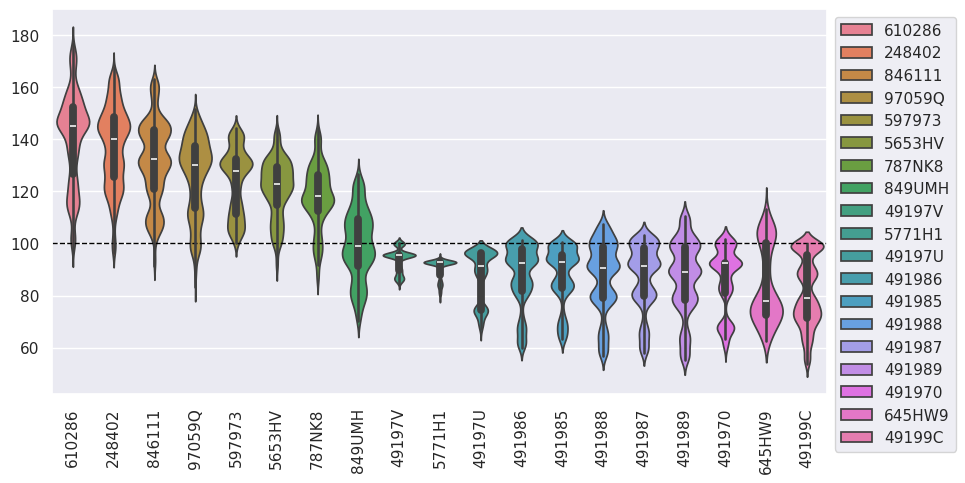

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.axhline(y=100,linestyle="--",color="black",linewidth=1)
sns.violinplot(df_ilbs.reindex(df_ilbs.mean().sort_values(ascending=False).index, axis=1),ax = ax,legend=True)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

## Nominal (Reference) Bond Time Series Analysis

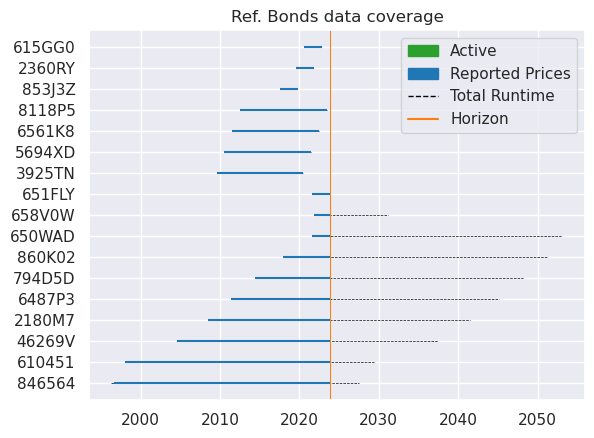

In [8]:
y = list(range(len(df_noms.columns)))
#available data
xmin = [min(df_noms[col].dropna().index) for col in df_noms.columns] 
xmax = [max(df_noms[col].dropna().index) for col in df_noms.columns]

#issue, maturity
issue_dates = [df_info.loc[bond,"ISSUE DATE"] for bond in df_noms.columns]
redem_dates = [df_info.loc[bond,"REDEMPTION DATE"] for bond in df_noms.columns]

fig, ax = plt.subplots()
plt.hlines(y=y,xmin=issue_dates,xmax=redem_dates, colors="black", linestyles="dashed", linewidths = .5)
plt.hlines(y=y,xmin=xmin,xmax=xmax,colors="tab:blue")
ax.axvline(x = max(df_noms.index),color="tab:orange",linewidth=0.75)
ax.set_yticks(list(range(len(df_noms.columns))))
ax.set_yticklabels(df_noms.columns)

for t in ax.yaxis.get_ticklabels():
    if df_info.loc[t.get_text(),"ACTIVE"] == "Active":
        t.set_color("tab:green")

plt.legend(handles=[mpatches.Patch(color="tab:green",label="Active"),
                    mpatches.Patch(color="tab:blue",label="Reported Prices"),
                    mlines.Line2D([0],[0],color="black",linestyle="dashed",linewidth=1, label="Total Runtime"),
                   mlines.Line2D([0],[1],color="tab:orange",label = "Horizon")])

ax.set_title("Ref. Bonds data coverage")

plt.show()

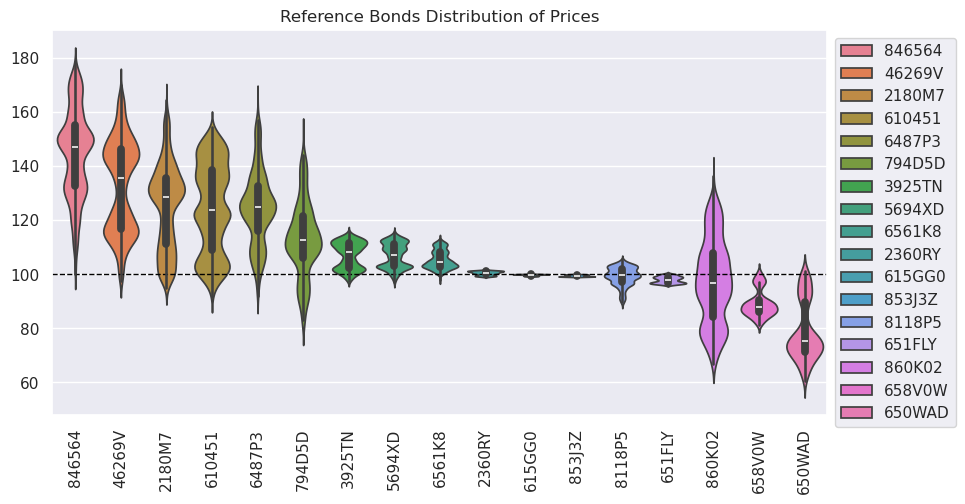

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.axhline(y=100,linestyle="--",color="black",linewidth=1)
sns.violinplot(df_noms.reindex(df_noms.mean().sort_values(ascending=False).index, axis=1),ax = ax,legend=True)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Reference Bonds Distribution of Prices")
plt.show()

## ILBs vs. Refrence Bonds - Inspecting Historical Prices

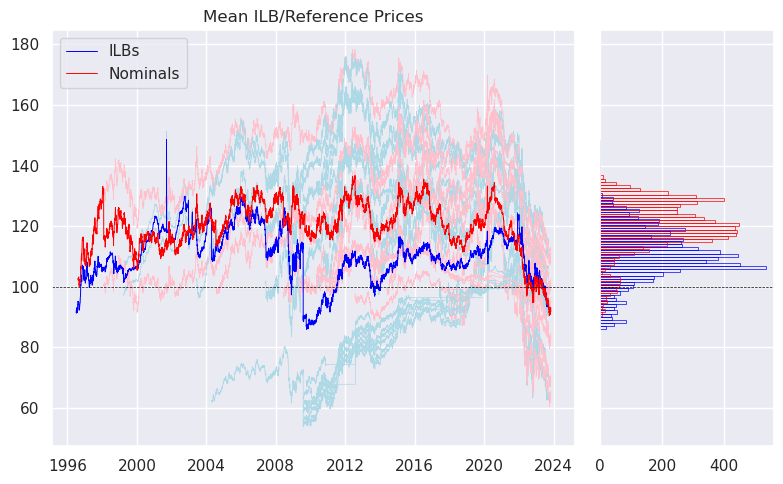

In [10]:
fig, axs = plt.subplots(ncols=2,width_ratios=(3,1),sharey=True,figsize=(8,5))

for ilb,ref in zip(df_ilbs.columns, df_noms.columns):
    sns.lineplot(x=df_ilbs.index,y=df_ilbs.loc[:,ilb],color="lightblue",ax=axs[0],linewidth=0.5)
    sns.lineplot(x=df_noms.index,y=df_noms.loc[:,ref],color="pink",ax=axs[0],linewidth=0.5)
    
ilb_means = df_ilbs.mean(axis=1)
nom_means = df_noms.mean(axis=1)

sns.lineplot(x=df_ilbs.index,y=ilb_means,color="blue",ax = axs[0], label="ILBs",linewidth=0.7)
sns.lineplot(x=df_noms.index,y=nom_means,color="red",ax = axs[0], label="Nominals",linewidth=0.7)

axs[0].axhline(y=100,linewidth=0.5,linestyle="--",color="black")
axs[0].set_title("Mean ILB/Reference Prices")
axs[0].set_ylabel("")

sns.histplot(y=ilb_means,color="blue",ax=axs[1],fill=False,kde=False)
sns.histplot(y=nom_means,color="red",ax=axs[1],fill=False,kde=False)
axs[1].axhline(y=100,linewidth=0.5,linestyle="--",color="black")

axs[0].set_xlabel("")
axs[1].set_xlabel("")

plt.tight_layout()
plt.show()

## Sub-sample Periods
Two or three subsample periods as identified by BoC - Empirical Analysis (...)
- January 1986 - December 1996: high and volatile inflation, large government financing needs
- January 1997 - May 2003: low and stable inflation
- (...)

In [11]:
#TODO

## Principal Components
There's many different possible drivers for the price of bonds among which is the interest rate. <br>
Following: A comparison of the hostoric prices of individual bonds and the observed interest rate in the bonds period.
### Interest Rates

In [12]:
df_interest = pd.read_csv("data/chartered_bank_interest.csv",index_col="date",parse_dates=True)
df_interest_info  =  pd.read_csv("data/chartered_bank_interest_info.csv",index_col = "id")
df_interest_info.replace(np.nan,"",inplace=True)
df_interest_info["description"] = df_interest_info["label"]+" "+df_interest_info["description"]
df_interest_info = df_interest_info.loc[:,["description"]]

fig, ax = plt.subplots()
df_interest.plot(ax = ax,linewidth=0.75)
plt.xticks(rotation=45)

out_01, out_02 = widgets.Output(), widgets.Output()

with out_01:
    plt.show()
with out_02:
    display(df_interest_info)

display(widgets.HBox([out_01,out_02]))

### Bond Market Prices vs. Interest Rates

In [13]:
interest_rate_dropdown = widgets.Dropdown(description="Interest",options=list(map(lambda t: t[::-1],df_interest_info[["description"]].itertuples(name=None))))
bond_dropdown = widgets.Dropdown(description="Bond",options=list(map(lambda t:t[::-1],list(df_info.loc[:,["NAME"]].itertuples(name=None)))))

def plot_price_vs_interest_rate(bond,rate,**kwargs):
    min_date,max_date = min(df_prices[bond].dropna().index), max(df_prices[bond].dropna().index)
    df_interest_temp = df_interest.loc[min_date:max_date,:]
    
    with sns.axes_style("dark"):
        fig,ax = plt.subplots()
        ax1 = plt.twinx()
        
    sns.lineplot(df_prices,x=df_prices.index,y=bond,ax=ax,linewidth=.75)
    ax.axhline(y=100,linestyle="--",color="black",linewidth=.5)
    
    sns.lineplot(df_interest_temp,x=df_interest_temp.index,y=rate,ax=ax1,color="tab:red",linewidth=0.75)

    ax.set_ylabel("Bond Price",color="tab:blue")
    ax1.set_ylabel("Interest Rate",color="tab:red")
    ax.set_xlabel("")
    ax1.set_xlabel("")

    plt_out,tbl_out = widgets.Output(), widgets.Output()
    with plt_out:
        plt.show()
    with tbl_out:
        display(df_info.loc[bond,:])
    display(widgets.HBox([plt_out,tbl_out]))


out_03 = widgets.interactive_output(plot_price_vs_interest_rate,{"bond":bond_dropdown,"rate":interest_rate_dropdown})
display(bond_dropdown,interest_rate_dropdown,out_03)

Dropdown(description='Bond', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/1…

Dropdown(description='Interest', options=(('Prime rate ', 'V80691311'), ('1-year Conventional mortgage', 'V806…

Output()

## Cashflow Structure and Nominal Coupon Payments 
Inspects the general cash flow structure that is used for calculating the YTMs:

In [14]:
coupons_only_checkbox = widgets.Checkbox(description = "Coupons only")
bond_dropdown_solo = widgets.Dropdown(description="Bond",options=list(map(lambda t:t[::-1],list(df_info[["NAME"]].itertuples(name=None)))))

def plot_cf(bond,coupons_only):

    issue_date = df_info.loc[bond,"ISSUE DATE"]
    redem_date = df_info.loc[bond,"REDEMPTION DATE"]
    freq = df_info.loc[bond,"COUPONS PER YEAR"]
    type = df_info.loc[bond,"TYPE"]
    
    if freq == 2: #semi-annual: 01.06 und 01.12.
        dt_idx = pd.date_range(start=issue_date,end=redem_date,freq="AS-JUN").append(pd.date_range(start=issue_date,end=redem_date,freq="AS-DEC"))
        coupon = df_info.loc[bond,"INDEX LINKED COUP"]/freq if type == "ILB" else df_info.loc[bond,"COUPON"]/freq
        df_coupon = pd.DataFrame(coupon,index=dt_idx,columns=["Coupon"])
    elif freq == 1: #not in the set
        pass
    else:
        df_coupon = pd.DataFrame(columns=["Coupon"])

    df_coupon.loc[issue_date,"Initial"] = -100
    df_coupon.loc[redem_date,"Redemption"] = 100
    df_cf = df_coupon.loc[df_coupon.index.sort_values(),:]

    fig, ax = plt.subplots(figsize=(12,4))
    
    if coupons_only:
        df_cf.plot(y="Coupon",kind="bar",ax=ax)
    else:
        df_cf.plot(kind="bar",ax=ax,stacked=True) 
    
    plt.xticks(rotation=90)
    
    plt.show()
    display(f"Issue Date: {issue_date.date()} | Redemption Date: {redem_date.date()}")
    with pd.option_context("display.max_rows", 8):
        display(df_cf)

out_04 = widgets.interactive_output(plot_cf,{"bond":bond_dropdown_solo,"coupons_only":coupons_only_checkbox})
display(bond_dropdown_solo,coupons_only_checkbox,out_04)

Dropdown(description='Bond', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/1…

Checkbox(value=False, description='Coupons only')

Output()

## CPI - Reference CPI: Base CPI & Index Ratio
The calculation of the index ratio used to scale the cashflows of RRBs is based upon the `All-items Consumer Price Index for Canada, not seasonally
adjusted` as published by Statistics Canada. <br>
$$Ref CPI_{07/12/2010}=CPI_{09/2010}+\frac{7-1}{31}\big( CPI_{10/2012} - CPI_{09/2010} \big)$$
$$IR_t = \frac{Ref CPI_{t}}{Ref CPI_{\tau}}$$
Where $t$ is a specific date and $\tau$ is the issue date of the bond. <br>

Source: [BoC  Index Ratios](https://www.bankofcanada.ca/markets/government-securities-auctions/calls-for-tenders-and-results/real-return-bonds/real-return-bonds-index-ratio/)
### Inspecting the CPI Dataset: Available Indices

In [15]:
ref_cpi = RefCPI(online=False)
ref_cpi.available_indices

array(['All-items', 'Food', 'Shelter',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis',
       'All-items excluding food and energy',
       'All-items excluding energy', 'Energy', 'Goods', 'Services'],
      dtype=object)

### The All-items Series

In [16]:
min_cpi_date, max_cpi_date = ref_cpi.series.index.min(), ref_cpi.series.index.max()
print(f"Min. date: {min_cpi_date.strftime('%m/%Y')} | Max. date {max_cpi_date.strftime('%m/%Y')}.")

Min. date: 01/1991 | Max. date 09/2023.


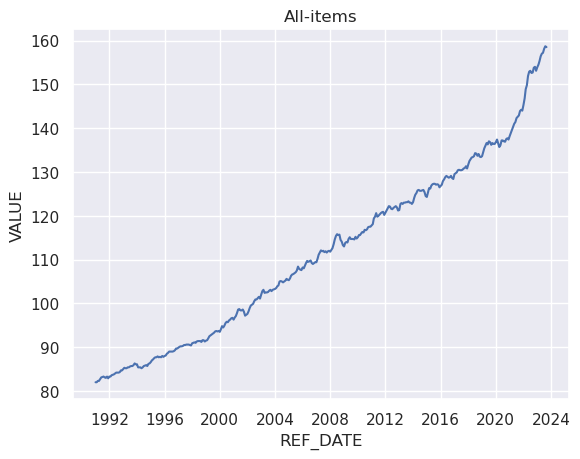

In [17]:
sns.lineplot(data=ref_cpi.series)
plt.title("All-items")
plt.show()

### Deviation Ref CPI Calculation - BoC Reporting
>INFO: Claculation precise for base (=issue) dates > 2007; Reason 1) is most probably a changing in the base year from 1992 to 2002. Instead of re-evaluating all historical reference CPIs the BoC introduced conversion factors that carry a five-digit precision and therfore bring additional deviation.
>
For some of the ILBs there's reported Reference CPIs:

In [18]:
def show_base_cpi_deviation(bond):
    print(bond, " ",df_info.loc[bond,"NAME"])
    
    base = df_info.loc[bond,"ISSUE DATE"]
    boc_cpi = df_info.loc[bond,"REF CPI BASE"]
    
    print("Issue Date: ",base)
    print("Calculation: ", ref_cpi.ref_cpi(base)) 
    print("Bank of Canada: ", boc_cpi)

out_05 = widgets.interactive_output(show_base_cpi_deviation,{"bond":ilb_dropdown})

display(ilb_dropdown, out_05)

Dropdown(description='ILB', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/12…

Output()

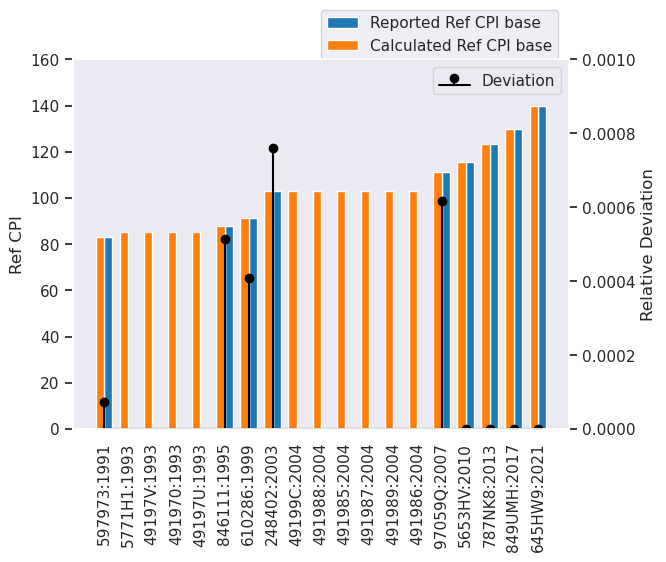

In [19]:
df_info_ilbs = df_info.loc[ilbs,:]
df_info_ilbs.sort_index(key= lambda x: df_info_ilbs.loc[x,"ISSUE DATE"],inplace=True)

issue_dates = [df_info.loc[bond,"ISSUE DATE"] for bond in df_info_ilbs.index]
cpi_reals = [df_info.loc[bond,"REF CPI BASE"] for bond in df_info_ilbs.index]
cpi_calcs = [ref_cpi.ref_cpi(issue_date) for issue_date in issue_dates]
diff = [abs(a-b)/a for a,b in zip(cpi_reals,cpi_calcs)]
labels = [n+":"+d.strftime("%Y") for n,d in zip(df_info_ilbs.index,issue_dates)]

with sns.axes_style("dark"):
    fig,ax = plt.subplots()
    ax1 = plt.twinx()

ax.bar(x=range(len(df_info_ilbs.index)),height=cpi_reals,align="edge",width=0.35,color="tab:blue",label="Reported Ref CPI base")
ax.bar(x=range(len(df_info_ilbs.index)),height=cpi_calcs,align="edge",width=-0.35,color="tab:orange",label="Calculated Ref CPI base")

ax1.stem(range(len(df_info_ilbs.index)),diff,linefmt="black",markerfmt="o",basefmt="black",label="Deviation")

ax.set_ylim(0,160)
ax1.set_ylim(0,0.001)

ax.set_xticks(range(len(df_info_ilbs.index)),labels=labels,rotation=90)
ax.set_ylabel("Ref CPI")
ax1.set_ylabel("Relative Deviation")

ax.legend(loc=(0.5,1))
ax1.legend()
plt.show()

# Bond Evaluation

In [20]:
df_info.loc["597973",:]

ISIN CODE                                   CA135087UL60
NAME                 CANADA 1991 4 1/4% 01/12/21 INDXLK.
COUPON                                            7.3104
AMOUNT ISSUED                                  5175000.0
COUPON DATES                                 01/06,01/12
INDEX LINKED COUP                                   4.25
COUPONS PER YEAR                                       2
1ST COUPON VALUE                                   2.026
OTHER YIELD                                       -3.635
RED. YIELD                                           NaN
CURRENCY                                              C$
ISSUE DATE                           1991-12-10 00:00:00
MATURITY YEAR                                       2021
START YEAR                                          1991
ACTIVE                                              Dead
REDEMPTION DATE                      2021-12-01 00:00:00
REF CPI BASE                                    83.07713
TYPE                           

### Evaluation as Nominal Bond - Example
Checked back and verified with [Vindeep](https://vindeep.com/Corporate/BondYTMCalculator.aspx)

#### Coupon Bond
Object Representation:

In [21]:
bnd_id = "597973"
name = df_info.loc[bnd_id,"NAME"]
issue_date = df_info.loc[bnd_id,"ISSUE DATE"]
redem_date = df_info.loc[bnd_id,"REDEMPTION DATE"]
coupon = df_info.loc[bnd_id,"INDEX LINKED COUP"]

bond = Bond(issue_date,redem_date,coupon,coupon_freq=["AS-DEC","AS-JUN"],name=name,id=bnd_id)
bond

597973 | CANADA 1991 4 1/4% 01/12/21 INDXLK. | 4.25
10/12/91 - 01/12/21

### Cashflow

In [22]:
eval_date = pd.Timestamp("2018-07-23")
price = df_prices.loc[eval_date,bnd_id]
cfs = bond.cashflows(eval_date,price,dirty=True,daycount="act/365")
print(f"Observed price on {eval_date.strftime('%d/%m/%Y')}: {price}")
cfs

Observed price on 23/07/2018: 112.882


2018-07-23   -113.487479
2018-12-01      2.125000
2019-06-01      2.125000
2019-12-01      2.125000
2020-06-01      2.125000
2020-12-01      2.125000
2021-06-01      2.125000
2021-12-01    102.125000
dtype: float64

In [23]:
bond.ytm(eval_date,price)

0.0038451369790610222

Inspecting the date differences utilized in the calculation of the internal rate of return (yield):

,cf,dd
2018-07-23,-113.487479,0
2018-12-01,2.125000,131
2019-06-01,2.125000,313
2019-12-01,2.125000,496
2020-06-01,2.125000,679
2020-12-01,2.125000,862
2021-06-01,2.125000,1044
2021-12-01,102.125000,1227


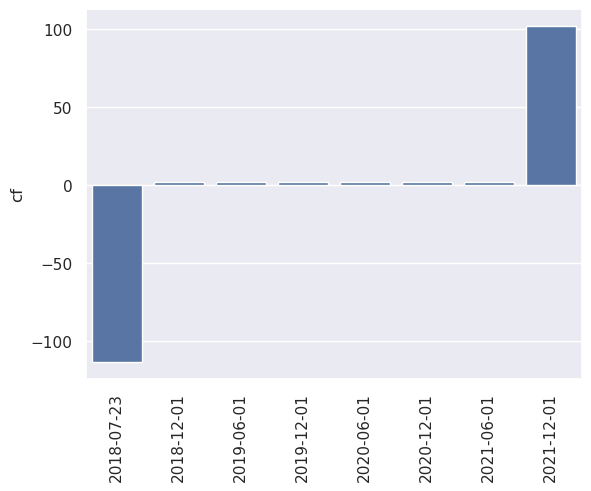

In [24]:
df = pd.DataFrame(cfs,columns=["cf"])
df["dd"] = (cfs.index-eval_date).days
fig,ax = plt.subplots()
sns.barplot(df,x=df.index,y="cf",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("")
display(df)
plt.show()

#### Zero Bond
`Coupon = 0` <br>
`Coupon Dates = []` <br>

In [25]:
bnd_id = "597973"
name = df_info.loc[bnd_id,"NAME"]
issue_date = df_info.loc[bnd_id,"ISSUE DATE"]
redem_date = df_info.loc[bnd_id,"REDEMPTION DATE"]
prices = df_prices[bnd_id]
coupon = 0

zero_bond = Bond(issue_date, redem_date, coupon)

In [26]:
zero_bond.cashflows(eval_date,93)

2018-07-23    -93.0
2021-12-01    100.0
dtype: float64

In [27]:
zero_bond.ytm(eval_date, 93)

0.02182256261202775

### Evaluation of ILBs - Example
Entweder ref_cpi_base übergeben, ansonsten wird es berechnet für das
issue_date.
#### Cashflows

In [28]:
ilb = ILB(issue_date,redem_date,4.25,coupon_freq=["AS-DEC","AS-JUN"],cpi_base = 83.07713,name=name)
cfs_ilb = ilb.cashflows(eval_date,price)
print(ilb)
cfs_ilb

None | CANADA 1991 4 1/4% 01/12/21 INDXLK. | 4.25
10/12/91 - 01/12/21


2018-07-23   -113.487479
2018-12-01      3.419869
2019-06-01      3.463346
2019-12-01      3.483810
2020-06-01      3.494053
2020-12-01      3.501724
2021-06-01      3.570786
2021-12-01    175.664191
dtype: float64

### Index Ratios & Ref CPI Base
Compare: BoC (`en_inratio21-12.pdf`): 4.25% 1 Dec. 2021 Ref CPI Base: 83.07713 | IR für 1 Dec. 2021: 1.72009 <br>
Compare [BoC Index Ratios](https://www.bankofcanada.ca/markets/government-securities-auctions/calls-for-tenders-and-results/real-return-bonds/real-return-bonds-index-ratio/) <br>
**Frage: Auch den negativen CF (Marktpreis) mit einem IR skalieren?**
#### Scaling the Cash Flows of an ILB

In [29]:
ilb.index_ratios

2018-07-23    1.00000
2018-12-01    1.60935
2019-06-01    1.62981
2019-12-01    1.63944
2020-06-01    1.64426
2020-12-01    1.64787
2021-06-01    1.68037
2021-12-01    1.72009
dtype: float64

In [30]:
#ilb.ytm(eval_date,price)

# Yield Curves
## Yield-to-Maturity
**Daily yield to maturity for a given bond** (!= Zero Curve) <br>
**Für Nominal Bonds**: Cashflows lassen sich für jedes beliebige Redemption Datum berechnen: <br>
**Für ILBs gilt**: Die historrischen YTMs lassen sich nur bis zu einem Redemption Datum berechnen, für welche auch eine Ref CPI, abgeleitet aus historischen CPIs existiert. Sonst kann der Index-Ratio nicht berechnet werden mit dem die Cashflows skaliert werden.

### Initializing an ILB with IR-scaled cashflows

In [31]:
eval_date = pd.Timestamp("2009-08-05")

bnd_id = "597973"
name = df_info.loc[bnd_id,"NAME"]
issue_date = df_info.loc[bnd_id,"ISSUE DATE"]
redem_date = df_info.loc[bnd_id,"REDEMPTION DATE"]
coupon = df_info.loc[bnd_id,"INDEX LINKED COUP"]

ilb_expl = ILB(issue_date,redem_date,coupon,coupon_freq=["AS-JUN","AS-DEC"],name=name,id=bnd_id)
ilb_expl

597973 | CANADA 1991 4 1/4% 01/12/21 INDXLK. | 4.25
10/12/91 - 01/12/21

In [32]:
#Setting prices after initilaizing
#accessing historical prices with the Bond.prices attribute

ilb_expl.prices = df_prices[ilb_expl.id]
price = ilb_expl.prices.loc[eval_date]
ilb_expl.cashflows(eval_date,price)

2009-08-05   -129.256849
2009-12-01      2.934094
2010-06-01      2.957108
2010-12-01      2.990364
2011-06-01      3.054326
2011-12-01      3.085011
2012-06-01      3.113146
2012-12-01      3.120818
2013-06-01      3.143852
2013-12-01      3.154074
2014-06-01      3.192451
2014-12-01      3.218036
2015-06-01      3.230829
2015-12-01      3.251292
2016-06-01      3.271756
2016-12-01      3.294770
2017-06-01      3.322905
2017-12-01      3.345940
2018-06-01      3.399660
2018-12-01      3.420124
2019-06-01      3.463601
2019-12-01      3.484065
2020-06-01      3.494307
2020-12-01      3.501979
2021-06-01      3.571041
2021-12-01    175.677468
dtype: float64

In [33]:
ilb_expl.ytm(eval_date,price)

0.06955412976382126

### Example: Spline Fitting
**Info:** ytm very sensitive to missing(?) data/ constant prices: e.g. `CPN STRIP 01/12/19`

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import Pipeline
import pickle

with open("export/ytm_ilb_as_nominal_dataframes.pickle","rb") as f:
#with open("export/ytm_ilb_as_scaled_dataframes.pickle","rb") as f:
    data = pickle.load(f)

In [35]:
ytm_dropdown = widgets.Dropdown(description = "Bond",options = [(df_info.loc[lbl,"NAME"],lbl) for lbl in data.keys()])
ytm_dropdown.value = "46269V"
log_checkbox = widgets.Checkbox(description = "log",value=False)
spline_checkbox = widgets.Checkbox(description= "Spline",value=True)

def plot_yield_curve(bond,log=False,spline=True):
    yield_curve = data[bond].dropna()
    df_sorted = yield_curve.sort_values(by="TTM")

    fig,axs = plt.subplots(nrows=2,height_ratios=(3,2),sharex=True)
    sns.lineplot(yield_curve,x="TTM",y="YTM",linewidth=.75,ax=axs[0],color="tab:grey",label="YTM")

    if spline:
        X,y = df_sorted[["TTM"]], df_sorted["YTM"]
    
        model = Pipeline([
            ('poly', SplineTransformer(n_knots=7,degree=3)), #Spline with N=9
            ('linear', LinearRegression())
        ])
        model.fit(X,y)
    
        X_test = pd.DataFrame(data=np.linspace(X.min(),X.max(),100),columns=["TTM"])
        y_pred = model.predict(X_test)

        sns.lineplot(x=X_test["TTM"],y=y_pred,ax=axs[0],linewidth=1,linestyle="--",color="tab:red",label="Spline")
    
    if log:
        axs[0].set_yscale("log")
        
    sns.lineplot(data=yield_curve,x="TTM",y="P",ax=axs[1],label="Price",linewidth=0.75)
    axs[0].set_title(bond)
    plt.tight_layout()
    plt.show()

out_06 = widgets.interactive_output(plot_yield_curve,{"bond":ytm_dropdown,"log":log_checkbox,"spline":spline_checkbox})
display(ytm_dropdown,log_checkbox,spline_checkbox,out_06)

Dropdown(description='Bond', index=21, options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 19…

Checkbox(value=False, description='log')

Checkbox(value=True, description='Spline')

Output()

**Question:** The YTMs seem reasonable but seem to diverge for some bonds as they come closer to maturity e.g. `CANADA 2020 1/4%`
### Detail Investigation
TODO: Span Selector

597973 | CANADA 1991 4 1/4% 01/12/21 INDXLK. | 4.25
10/12/91 - 01/12/21


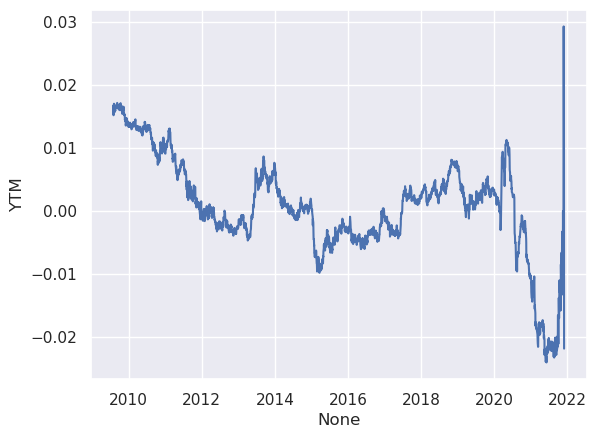

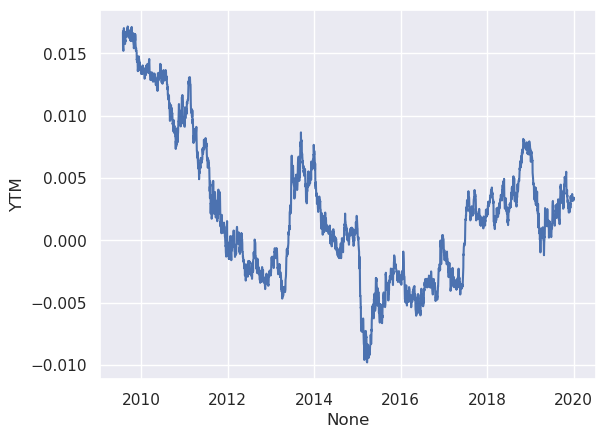

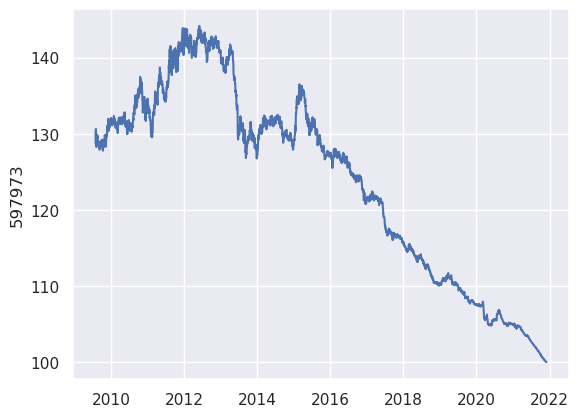

In [36]:
print(ilb_expl)
yield_curve = data[ilb_expl.id]

sns.lineplot(yield_curve,x=yield_curve.index,y="YTM")
#plt.yscale("log")
plt.show()

yc_clean = yield_curve.loc[:"2020-01-01",:]

sns.lineplot(yc_clean,x=yc_clean.index,y="YTM")
plt.show()

sns.lineplot(ilb_expl.prices)
plt.show()

## Current-Yield Curves

# Break Even Inflation
## Choosing ILB - Nominal Bond Pairs
ILB: YTM based on cash flow with `INDEX LINKED COUP` <br>
Nominal Bond: YTM based on cash flow with `COUPON` <br>

In [45]:
noms_dropdown = widgets.Dropdown(description="Nominals",options=list(map(lambda t:t[::-1],list(df_info.loc[noms,["NAME"]].itertuples(name=None)))))

def compare_yields(ilb,nom):
    fig, ax = plt.subplots()
    df_ilb, df_nom = data[ilb], data[nom]
    sns.lineplot(df_ilb,x=df_ilb.index,y="YTM",ax=ax,label="ILB",color="blue",linewidth=0.5)
    sns.lineplot(df_nom,x=df_nom.index,y="YTM",ax=ax,label="Nominal Bond",color="red",linewidth=0.5)

    diff = df_nom["YTM"] - df_ilb["YTM"]
    
    plt.fill_between(diff.index.values, diff.values,color="tab:green",alpha=0.5,linewidth=0.5,label="BEI")
    ax.set_xlabel("")
    plt.legend()
    plt.show()


#out_07 = widgets.interactive_output(compare_yields,{"ilb":ilb_dropdown,"nom":noms_dropdown})
#display(widgets.HBox([ilb_dropdown,noms_dropdown]),out_07)
widgets.interact_manual(compare_yields,ilb=ilb_dropdown, nom=noms_dropdown);

interactive(children=(Dropdown(description='ILB', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), …

## Missing Market Data Handling

# Bank of Canada API

In [40]:
import requests
import json
import pandas as pd
base_url = "https://www.bankofcanada.ca/valet/"
r = requests.get(base_url+"observations/INDEX_RATIO_2021/csv")

In [41]:
print(r.text)

﻿"TERMS AND CONDITIONS"
"https://www.bankofcanada.ca/terms/"

"SERIES"
"id","label","description"
"INDEX_RATIO_2021","Real Return Bonds - Index ratio 2021","Real Return Bonds - Index ratio 2021"

"OBSERVATIONS"
"date","INDEX_RATIO_2021"
"2021-12-01","1.72009"
"2021-12-02","1.72048"
"2021-12-03","1.72086"
"2021-12-04","1.72125"
"2021-12-05","1.72164"
"2021-12-06","1.72203"
"2021-12-07","1.72242"
"2021-12-08","1.72281"
"2021-12-09","1.72319"
"2021-12-10","1.72358"
"2021-12-11","1.72397"
"2021-12-12","1.72436"
"2021-12-13","1.72475"
"2021-12-14","1.72514"
"2021-12-15","1.72552"
"2021-12-16","1.72591"
"2021-12-17","1.72630"
"2021-12-18","1.72669"
"2021-12-19","1.72708"
"2021-12-20","1.72747"
"2021-12-21","1.72785"
"2021-12-22","1.72824"
"2021-12-23","1.72863"
"2021-12-24","1.72902"
"2021-12-25","1.72941"
"2021-12-26","1.72980"
"2021-12-27","1.73018"
"2021-12-28","1.73057"
"2021-12-29","1.73096"
"2021-12-30","1.73135"
"2021-12-31","1.73174"
"2022-01-01","1.73213"
"2022-01-02","1.73224"
"202